In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:
dataset=pd.read_csv('Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


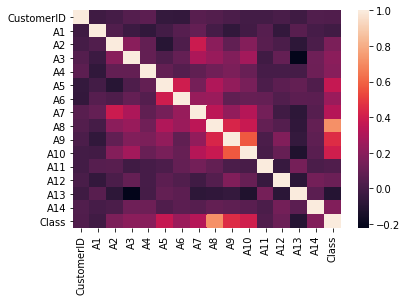

In [11]:
df=dataset.corr()
sns.heatmap(df)

In [12]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)
print(X)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


In [14]:
from minisom import MiniSom
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)

In [15]:
som.train_random(data=X,num_iteration=100)

In [16]:
from pylab import bone,pcolor,colorbar,plot,show

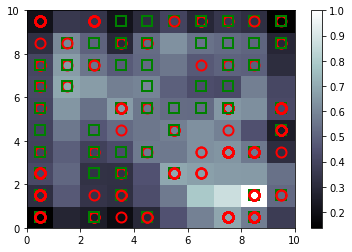

In [17]:
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()


In [22]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [23]:
print(frauds)

[[1.5648069e+07 0.0000000e+00 2.4500000e+01 1.7500000e+00 1.0000000e+00
  8.0000000e+00 4.0000000e+00 1.6500000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.3200000e+02 1.0000000e+00]
 [1.5731586e+07 0.0000000e+00 2.9500000e+01 2.0000000e+00 1.0000000e+00
  1.0000000e+01 8.0000000e+00 2.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.5600000e+02 1.8000000e+01]
 [1.5644453e+07 0.0000000e+00 1.8170000e+01 1.0000000e+01 1.0000000e+00
  1.1000000e+01 8.0000000e+00 1.6500000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 3.4000000e+02 1.0000000e+00]
 [1.5801473e+07 0.0000000e+00 2.0830000e+01 5.0000000e-01 1.0000000e+00
  1.0000000e+01 2.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.6000000e+02 1.0000000e+00]
 [1.5694666e+07 0.0000000e+00 2.6500000e+01 2.7100000e+00 1.0000000e+00
  8.0000000e+00 4.0000000e+00 8.5000000e-02 0.0000000e+00 0.